# COVID-19 Descriptive Statistics Project

This notebook demonstrates a **data analyst workflow** on the Our World in Data COVID-19 dataset.  
We focus on descriptive statistics (mean, median, mode, standard deviation) and present results with **visualizations** and **dashboards**.

**Key Deliverables:**
- Cleaning & preparation of raw COVID-19 daily data
- Descriptive statistics of cases and deaths
- Visualizations (histogram, boxplot, yearly distribution, density plot)
- Dashboard with KPIs + trends + peaks
- Export of top peak days (CSV)

# Step 1 — Data Collection

We use the [Our World in Data COVID-19 dataset](https://catalog.ourworldindata.org/garden/covid/latest/cases_deaths/cases_deaths.csv).  
This dataset contains daily reported COVID-19 cases and deaths by country.

- **Source:** Our World in Data (OWID)  
- **Format:** CSV  
- **Access method:** Direct link (acts like an API)  
- **Objective for this step:** Load the raw dataset into a Pandas DataFrame for inspection.

In [1]:
import pandas as pd

# Dataset URL
URL = "https://catalog.ourworldindata.org/garden/covid/latest/cases_deaths/cases_deaths.csv"

# Load dataset
df_raw = pd.read_csv(URL, parse_dates=["date"])

# Quick checks
print("Shape:", df_raw.shape)          # number of rows & columns
print("Columns:", df_raw.columns[:10]) # preview of first 10 column names
df_raw.head()

Shape: (512940, 40)
Columns: Index(['country', 'date', 'new_cases', 'total_cases', 'new_deaths',
       'total_deaths', 'weekly_cases', 'weekly_deaths',
       'weekly_pct_growth_cases', 'weekly_pct_growth_deaths'],
      dtype='object')


,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,cfr_100_cases,cfr_short_term,days_since_100_total_cases,days_since_5_total_deaths,days_since_1_total_cases_per_million,days_since_0_1_total_deaths_per_million,days_since_100_total_cases_and_5m_pop,total_deaths_last12m,total_deaths_per_100k_last12m,total_deaths_per_million_last12m
0,Afghanistan,2020-01-04,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-86.0,-91.0,-81.0,-91.0,-86.0,NaN,NaN,NaN
1,Afghanistan,2020-01-05,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-85.0,-90.0,-80.0,-90.0,-85.0,NaN,NaN,NaN
2,Afghanistan,2020-01-06,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-84.0,-89.0,-79.0,-89.0,-84.0,NaN,NaN,NaN
3,Afghanistan,2020-01-07,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-83.0,-88.0,-78.0,-88.0,-83.0,NaN,NaN,NaN
4,Afghanistan,2020-01-08,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-82.0,-87.0,-77.0,-87.0,-82.0,NaN,NaN,NaN


# Step 2 — Data Understanding (Exploration)

Before cleaning or analyzing, it’s important to **profile the dataset**:

- What columns exist?  
- What are the data types?  
- Are there missing values?  
- Any anomalies (like negative daily cases)?  

This step ensures we know the structure and quality of the dataset before making changes.

In [2]:
# Shape of the dataset
print("Rows, Columns:", df_raw.shape)

# Column names and data types
print("\nData types:")
print(df_raw.dtypes.head(15))  # show first 15 columns

# Check missing values
print("\nMissing values (top 15 cols):")
print(df_raw.isna().sum().head(15))

# Summary statistics for numeric columns
df_raw.describe().T.head(10)   # transpose for readability, show first 10 numeric cols

Rows, Columns: (512940, 40)

Data types:
country                               object
date                          datetime64[ns]
new_cases                            float64
total_cases                            int64
new_deaths                           float64
total_deaths                           int64
weekly_cases                         float64
weekly_deaths                        float64
weekly_pct_growth_cases              float64
weekly_pct_growth_deaths             float64
biweekly_cases                       float64
biweekly_deaths                      float64
biweekly_pct_growth_cases            float64
biweekly_pct_growth_deaths           float64
new_cases_per_million                float64
dtype: object

Missing values (top 15 cols):
country                            0
date                               0
new_cases                       3226
total_cases                        0
new_deaths                      2369
total_deaths                       0
weekly_cases     

,count,mean,std,min,25%,50%,75%,max
new_cases,509714.0,1.066026e+04,1.180139e+05,0.0,0.0,0.0,66.0,8401906.0
total_cases,512940.0,1.406776e+07,7.339679e+07,0.0,9106.0,82858.0,1067030.0,778448691.0
new_deaths,510571.0,1.018627e+02,8.088131e+02,0.0,0.0,0.0,0.0,57167.0
total_deaths,512940.0,1.538902e+05,7.727792e+05,0.0,67.0,1016.0,12266.0,7099773.0
weekly_cases,508453.0,7.480606e+04,7.055269e+05,0.0,0.0,35.0,1418.0,44814230.0
weekly_deaths,509326.0,7.147632e+02,5.214904e+03,0.0,0.0,0.0,14.0,103745.0
weekly_pct_growth_cases,329146.0,3.406779e+01,9.079311e+02,-100.0,-27.3,-3.4,24.3,120200.0
weekly_pct_growth_deaths,212115.0,1.620507e+01,4.956271e+02,-100.0,-33.3,-3.5,20.0,125400.0
biweekly_cases,506673.0,1.501338e+05,1.381412e+06,0.0,0.0,79.0,2954.0,73352399.0
biweekly_deaths,507581.0,1.434408e+03,1.041481e+04,0.0,0.0,0.0,28.0,205472.0


# Step 3 — Data Cleaning

**Cleaning Decisions:**
1. Keep only relevant columns for descriptive statistics:  
   - `country`, `date`, `new_cases`, `total_cases`, `new_deaths`, `total_deaths`
2. Convert all numeric columns to proper numeric types.
3. Negative daily values (due to data corrections) → set to `NaN` so they don't distort statistics.
4. Drop rows where both `new_cases` and `new_deaths` are missing (no information for that day).


In [3]:
# Select relevant columns
cols = ["country", "date", "new_cases", "total_cases", "new_deaths", "total_deaths"]
df = df_raw[cols].copy()

# Ensure numeric columns are truly numeric
for col in ["new_cases", "total_cases", "new_deaths", "total_deaths"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Replace negative daily counts with NaN
df.loc[df["new_cases"] < 0, "new_cases"] = None
df.loc[df["new_deaths"] < 0, "new_deaths"] = None

# Drop rows with no signal (both daily counts missing)
df = df.dropna(subset=["new_cases", "new_deaths"], how="all")

print("After cleaning:", df.shape)
df.head()

After cleaning: (510601, 6)


,country,date,new_cases,total_cases,new_deaths,total_deaths
0,Afghanistan,2020-01-04,0.0,0,0.0,0
1,Afghanistan,2020-01-05,0.0,0,0.0,0
2,Afghanistan,2020-01-06,0.0,0,0.0,0
3,Afghanistan,2020-01-07,0.0,0,0.0,0
4,Afghanistan,2020-01-08,0.0,0,0.0,0


# Step 4 — Data Preparation (Filter & Organize)

Now that the dataset is clean, we prepare it for analysis:

1. Focus on a single country (Selected country: **Canada**).
2. Sort data by date (important for time-series analysis).
3. Keep a copy ready for descriptive statistics and later visualizations.

In [4]:
# Choose a country (change "Canada" to whichever country you want)
country = "Canada"

# Filter dataset
df_country = df[df["country"] == country].copy()

# Sort by date
df_country = df_country.sort_values("date")

# Quick check
print(f"{country}: {df_country.shape[0]} rows")
print(f"Date range: {df_country['date'].min()} → {df_country['date'].max()}")
df_country.head()

Canada: 2060 rows
Date range: 2020-01-04 00:00:00 → 2025-08-24 00:00:00


,country,date,new_cases,total_cases,new_deaths,total_deaths
80340,Canada,2020-01-04,0.0,0,0.0,0
80341,Canada,2020-01-05,0.0,0,0.0,0
80342,Canada,2020-01-06,0.0,0,0.0,0
80343,Canada,2020-01-07,0.0,0,0.0,0
80344,Canada,2020-01-08,0.0,0,0.0,0


In [5]:
# Top 10 days with the highest new deaths
df_country.sort_values("new_deaths", ascending=False).head(10)

,country,date,new_cases,total_cases,new_deaths,total_deaths
81425,Canada,2022-12-24,17398.0,4476385,382.0,48421
81369,Canada,2022-10-29,21359.0,4341788,380.0,45820
81362,Canada,2022-10-22,21454.0,4320429,379.0,45440
81376,Canada,2022-11-05,20964.0,4362752,376.0,46196
81432,Canada,2022-12-31,16395.0,4492780,350.0,48771
81292,Canada,2022-08-13,25692.0,4119450,346.0,42768
81383,Canada,2022-11-12,18396.0,4381148,344.0,46540
81446,Canada,2023-01-14,16796.0,4526267,332.0,49361
81397,Canada,2022-11-26,14582.0,4411019,322.0,47166
81404,Canada,2022-12-03,15134.0,4426153,308.0,47474


# Step 5 — Descriptive Statistics

Now we calculate the **core statistical measures** for daily COVID-19 data:

- **Mean** → the average daily count  
- **Median** → the middle value (robust to outliers)  
- **Mode** → the most frequent daily value  
- **Standard Deviation (σ)** → how much daily counts vary around the mean  

We’ll compute these for both `new_cases` and `new_deaths`.

In [6]:
import numpy as np

# Helper function
def descriptive_stats(series):
    s = series.dropna()
    mode_vals = s.mode()
    mode_val = mode_vals.iloc[0] if len(mode_vals) > 0 else np.nan
    return {
        "count": len(s),
        "mean": s.mean(),
        "median": s.median(),
        "mode": mode_val,
        "std_dev": s.std(),
        "min": s.min(),
        "max": s.max(),
        "p95": s.quantile(0.95)  # 95th percentile, shows extreme peaks
    }

# Stats for new cases & new deaths
cases_stats = descriptive_stats(df_country["new_cases"])
deaths_stats = descriptive_stats(df_country["new_deaths"])

print("=== New Cases (Daily) ===")
for k,v in cases_stats.items():
    print(f"{k:10}: {v:.2f}")

print("\n=== New Deaths (Daily) ===")
for k,v in deaths_stats.items():
    print(f"{k:10}: {v:.2f}")

=== New Cases (Daily) ===
count     : 2059.00
mean      : 2340.49
median    : 0.00
mode      : 0.00
std_dev   : 5301.71
min       : 0.00
max       : 49148.00
p95       : 9674.10

=== New Deaths (Daily) ===
count     : 2059.00
mean      : 27.01
median    : 0.00
mode      : 0.00
std_dev   : 52.89
min       : 0.00
max       : 382.00
p95       : 142.10


# Step 6 — Visualization (Exploratory Data Analysis)

Descriptive stats give us numbers, but visualizations reveal patterns:

1. **Histogram** → shows distribution of daily cases/deaths with mean, median, and mode lines.
2. **Boxplot** → shows spread and outliers (spikes).

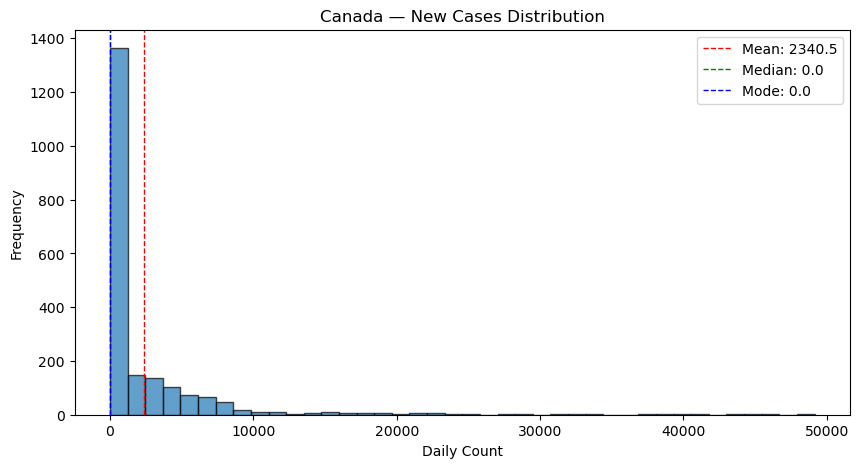

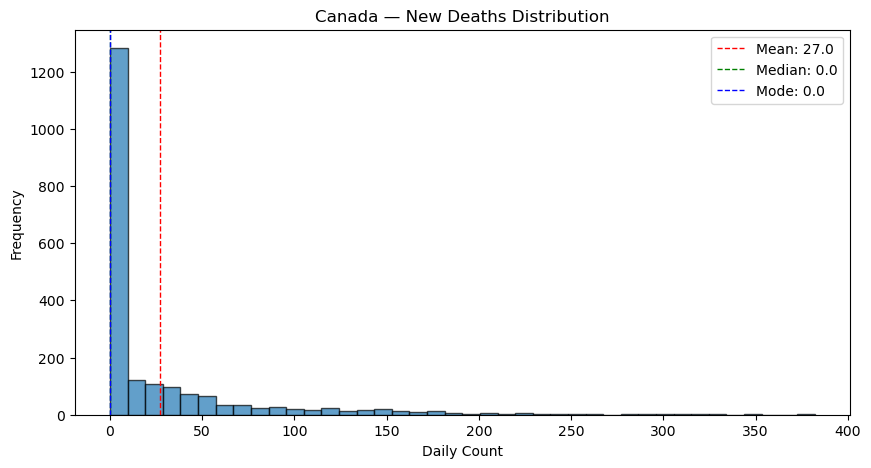

In [7]:
import matplotlib.pyplot as plt

def plot_hist_with_stats(series, title):
    s = series.dropna()
    plt.figure(figsize=(10,5))
    plt.hist(s, bins=40, edgecolor='black', alpha=0.7)

    # Overlay mean, median, mode
    plt.axvline(s.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {s.mean():.1f}")
    plt.axvline(s.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {s.median():.1f}")
    mode_val = s.mode().iloc[0]
    plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label=f"Mode: {mode_val:.1f}")

    plt.title(title)
    plt.xlabel("Daily Count")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Run for cases & deaths
plot_hist_with_stats(df_country["new_cases"], f"{country} — New Cases Distribution")
plot_hist_with_stats(df_country["new_deaths"], f"{country} — New Deaths Distribution")

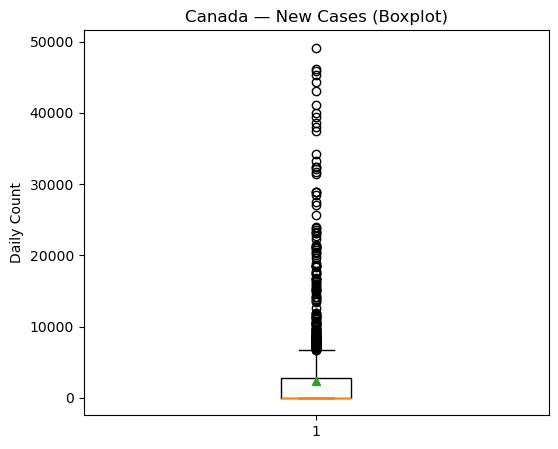

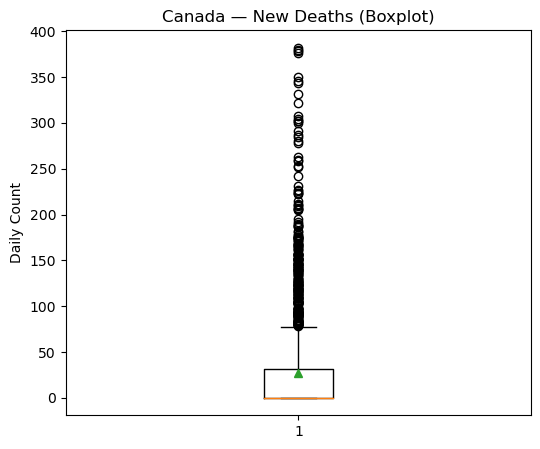

In [8]:
def plot_box(series, title):
    plt.figure(figsize=(6,5))
    plt.boxplot(series.dropna(), vert=True, showmeans=True)
    plt.title(title)
    plt.ylabel("Daily Count")
    plt.show()

# Run for cases & deaths
plot_box(df_country["new_cases"], f"{country} — New Cases (Boxplot)")
plot_box(df_country["new_deaths"], f"{country} — New Deaths (Boxplot)")

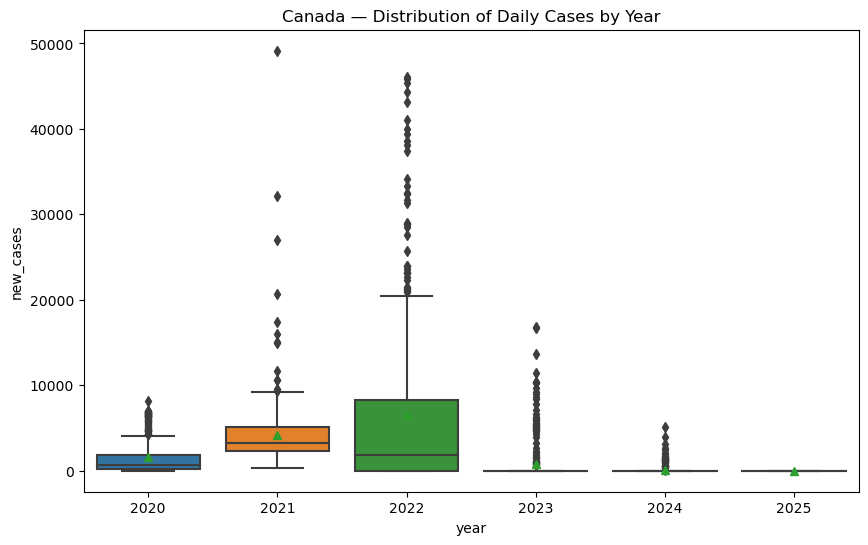

In [9]:
import seaborn as sns

df_country["year"] = df_country["date"].dt.year

plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="new_cases", data=df_country, showmeans=True)
plt.title(f"{country} — Distribution of Daily Cases by Year")
plt.show()

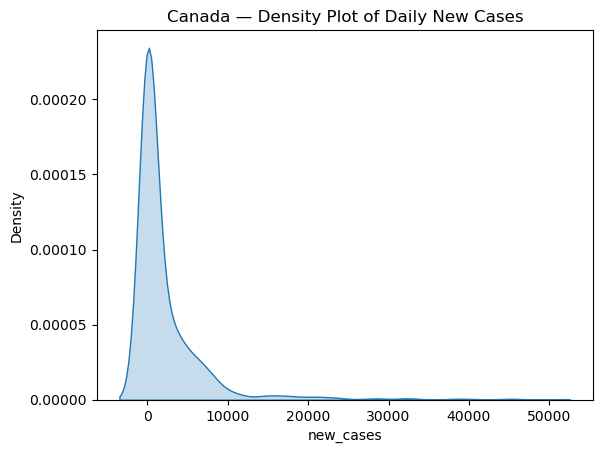

In [10]:
sns.kdeplot(df_country["new_cases"], fill=True)
plt.title(f"{country} — Density Plot of Daily New Cases")
plt.show()

<Axes: title={'center': 'Canada — Total Cases & Deaths Over Time'}, xlabel='date'>

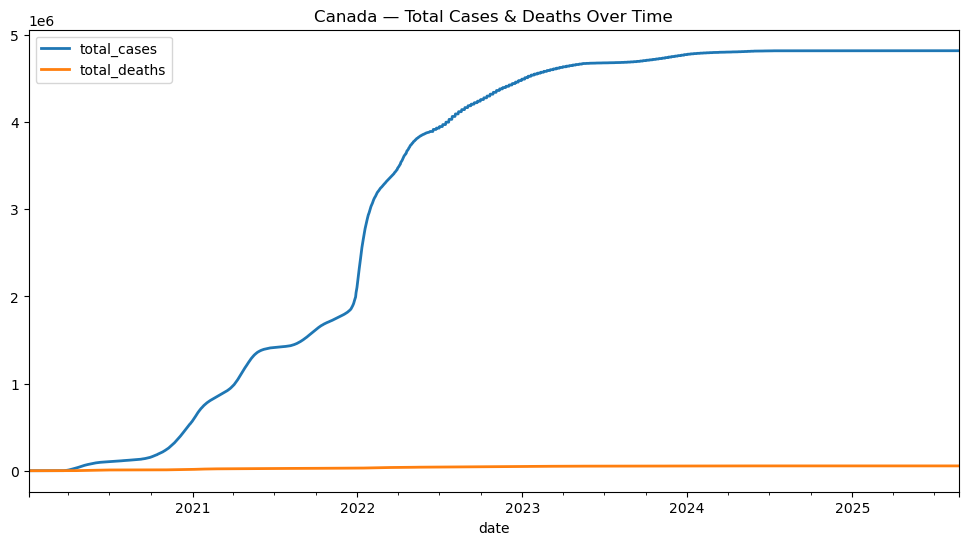

In [11]:
df_country.set_index("date")[["total_cases","total_deaths"]].plot(
    figsize=(12,6), linewidth=2, title=f"{country} — Total Cases & Deaths Over Time"
)

# Step 7 — KPI Dashboard

To make the analysis easy to understand, we present:

**KPIs:**
- 📊 Average Daily New Cases
- 📊 Average Daily New Deaths
- 📈 Peak Daily Cases
- 📈 Peak Daily Deaths
- 📉 % of Days with Zero Cases

**Visuals:**
1. Trend of new cases/deaths with 7-day rolling average.
2. Year-by-year comparison (boxplot or bar).

In [12]:
# KPI calculations
avg_cases = df_country["new_cases"].mean()
avg_deaths = df_country["new_deaths"].mean()
peak_cases = df_country["new_cases"].max()
peak_deaths = df_country["new_deaths"].max()
zero_days = (df_country["new_cases"] == 0).mean() * 100

print(f"📊 Average Daily Cases: {avg_cases:,.0f}")
print(f"📊 Average Daily Deaths: {avg_deaths:,.0f}")
print(f"📈 Peak Daily Cases: {peak_cases:,.0f}")
print(f"📈 Peak Daily Deaths: {peak_deaths:,.0f}")
print(f"📉 % of Days with Zero Cases: {zero_days:.1f}%")

📊 Average Daily Cases: 2,340
📊 Average Daily Deaths: 27
📈 Peak Daily Cases: 49,148
📈 Peak Daily Deaths: 382
📉 % of Days with Zero Cases: 53.7%


## Step 7.1 — Visual Dashboard

We combine:
- KPI text block
- 7-day rolling averages
- Yearly averages (cases & deaths)
- Top 30 peak days (bar chart)

This dashboard makes it easier to **see both long-term trends and short-term spikes** in one screen.

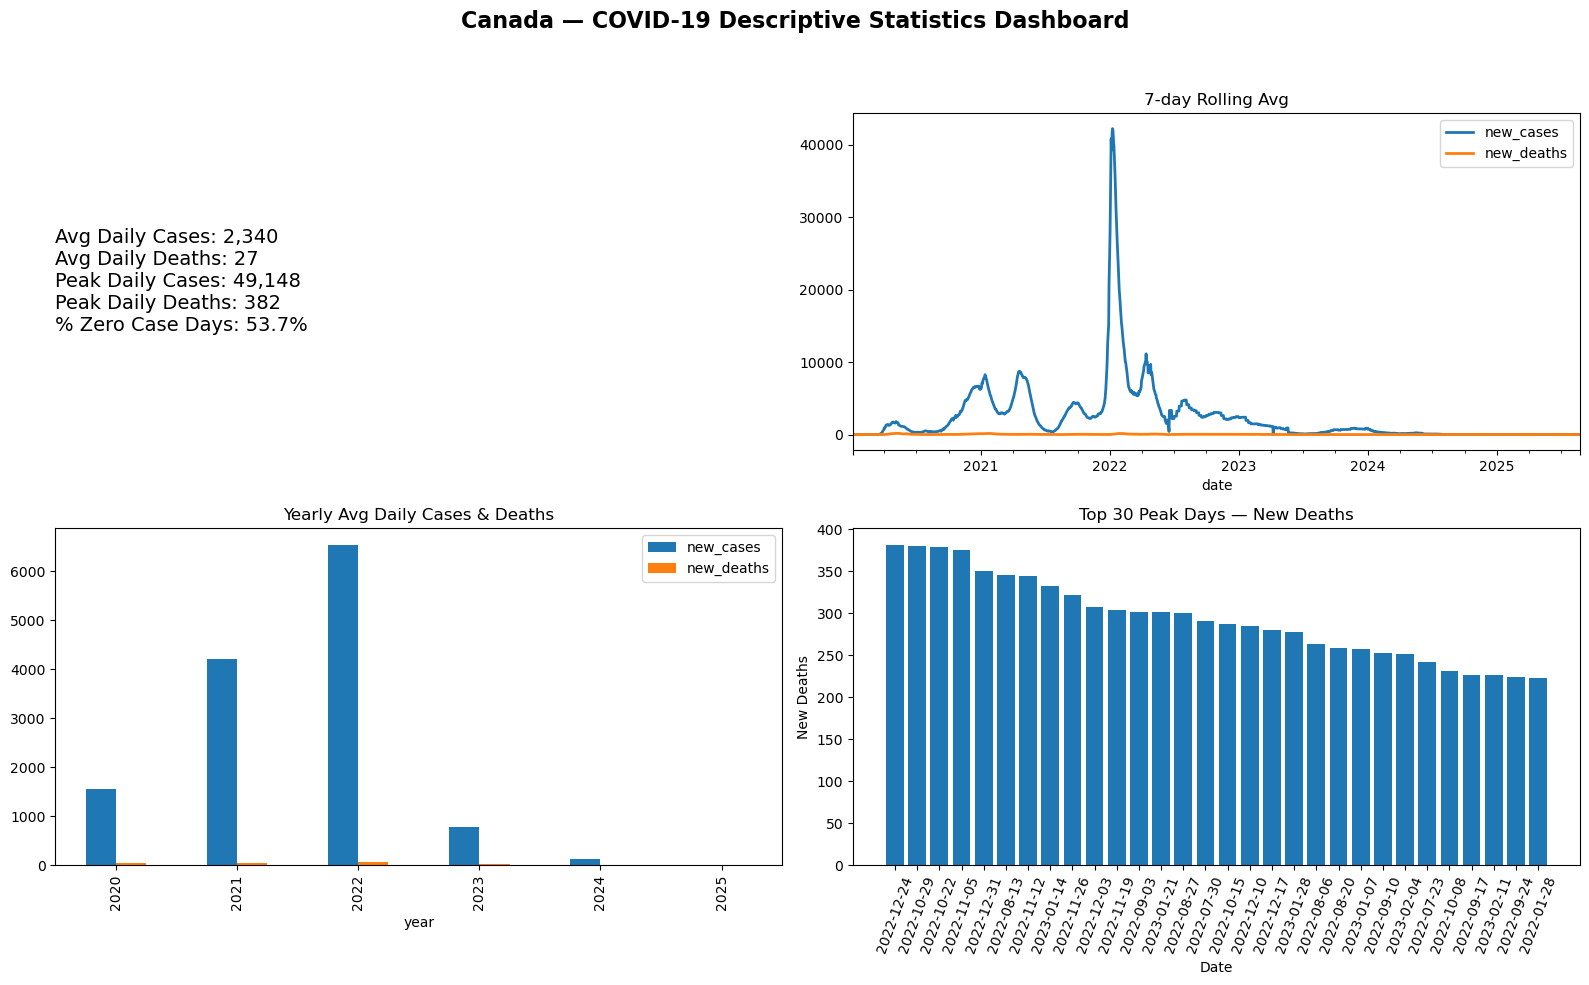

In [27]:
import matplotlib.pyplot as plt

# === KPIs ===
avg_cases = df_country["new_cases"].mean()
avg_deaths = df_country["new_deaths"].mean()
peak_cases = df_country["new_cases"].max()
peak_deaths = df_country["new_deaths"].max()
zero_days = (df_country["new_cases"] == 0).mean() * 100

# === Yearly averages ===
df_country["year"] = df_country["date"].dt.year
yearly = df_country.groupby("year")[["new_cases","new_deaths"]].mean().round()

# === Top 30 Peak Days ===
top_cases_30 = (
    df_country.dropna(subset=["new_cases"])
    .sort_values("new_cases", ascending=False)
    .head(30)
)
top_deaths_30 = (
    df_country.dropna(subset=["new_deaths"])
    .sort_values("new_deaths", ascending=False)
    .head(30)
)

# === Dashboard Layout ===
fig, axes = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle(f"{country} — COVID-19 Descriptive Statistics Dashboard", fontsize=16, fontweight="bold")

# KPI box (print text inside empty plot)
axes[0,0].axis("off")
kpi_text = (
    f"Avg Daily Cases: {avg_cases:,.0f}\n"
    f"Avg Daily Deaths: {avg_deaths:,.0f}\n"
    f"Peak Daily Cases: {peak_cases:,.0f}\n"
    f"Peak Daily Deaths: {peak_deaths:,.0f}\n"
    f"% Zero Case Days: {zero_days:.1f}%"
)
axes[0,0].text(0, 0.5, kpi_text, fontsize=14, va="center")

# Trend line (7-day rolling)
df_country.set_index("date")[["new_cases","new_deaths"]].rolling(7).mean().plot(
    ax=axes[0,1], linewidth=2, title="7-day Rolling Avg"
)

# Yearly averages (bar chart)
yearly.plot(kind="bar", ax=axes[1,0], title="Yearly Avg Daily Cases & Deaths")

# Top 30 Peak Days (Deaths as example)
top_deaths_30_plot = top_deaths_30.copy()
top_deaths_30_plot["date_str"] = top_deaths_30_plot["date"].dt.strftime("%Y-%m-%d")

axes[1,1].bar(top_deaths_30_plot["date_str"], top_deaths_30_plot["new_deaths"])
axes[1,1].set_title("Top 30 Peak Days — New Deaths")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("New Deaths")
axes[1,1].tick_params(axis="x", rotation=70)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


## Step 7.2 — Focused Peak Days View

We also show **Top 30 days** separately for:
- New Cases  
- New Deaths  

This isolates extreme spikes for easy inspection.

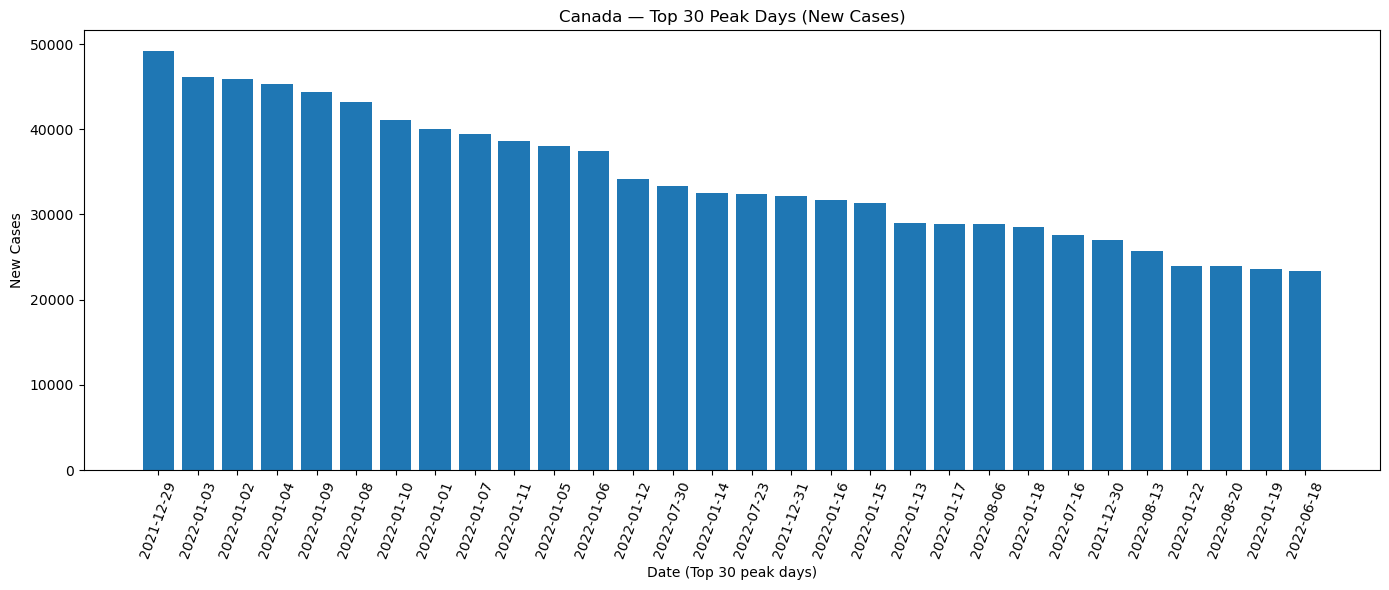

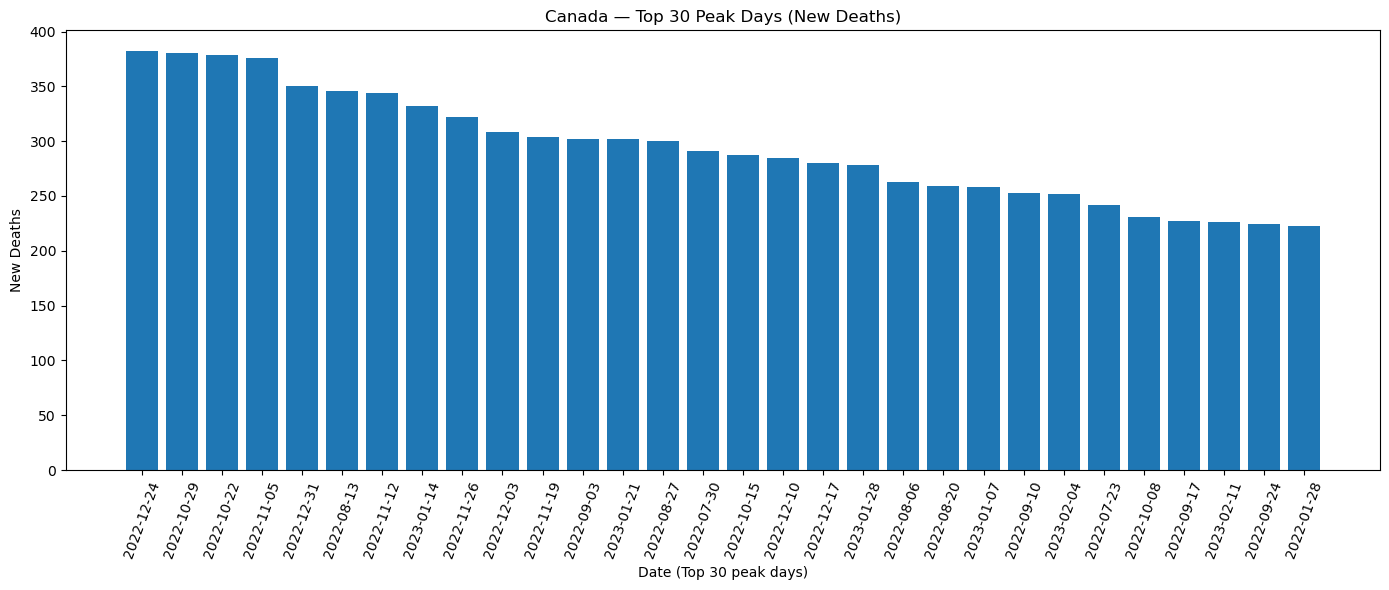

In [18]:
import matplotlib.pyplot as plt

def plot_top_bar(df_top, value_col, title):
    # Make a readable label with date
    temp = df_top.copy()
    temp["date_str"] = temp["date"].dt.strftime("%Y-%m-%d")

    plt.figure(figsize=(14,6))
    plt.bar(temp["date_str"], temp[value_col])
    plt.title(title)
    plt.xlabel("Date (Top 30 peak days)")
    plt.ylabel(value_col.replace("_", " ").title())
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show()

plot_top_bar(top_cases_30,  "new_cases",  f"{country} — Top 30 Peak Days (New Cases)")
plot_top_bar(top_deaths_30, "new_deaths", f"{country} — Top 30 Peak Days (New Deaths)")

## Step 8 — Export Peak Days

For reproducibility and future analysis, we save:
- Top 30 peak days for new cases
- Top 30 peak days for new deaths

Exports are in CSV format (`top30_country_new_cases.csv` and `top30_country_new_deaths.csv`).

In [ ]:
top_cases_30.to_csv(f"top30_{country.lower().replace(' ','_')}_new_cases.csv", index=False) 
top_deaths_30.to_csv(f"top30_{country.lower().replace(' ','_')}_new_deaths.csv", index=False)

# Step 9 — Two-Country Comparison Dashboard

We compare two countries (Canada vs United States) side by side:  
- KPIs for each country  
- Rolling averages of cases & deaths  
- Yearly averages (cases & deaths, grouped bars)  

This shows how pandemic waves differed across nations.

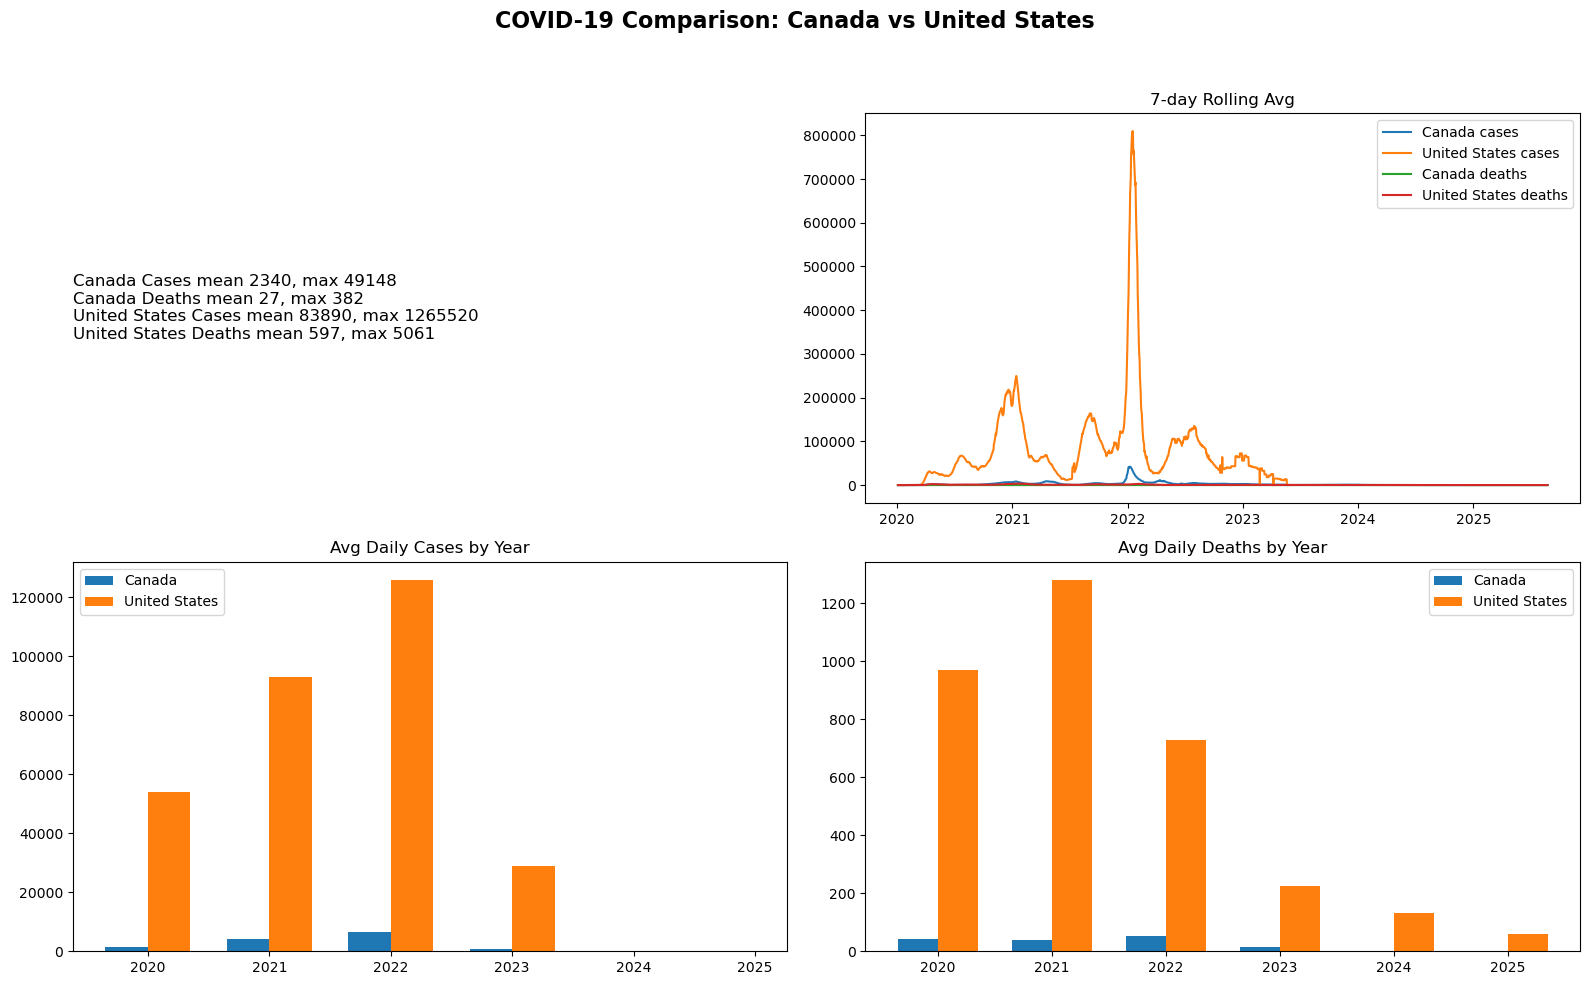

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def make_country_df(df, country):
    d = df[df["country"] == country].copy().sort_values("date")
    d["year"] = d["date"].dt.year
    d["cases_7d"]  = d["new_cases"].rolling(7, min_periods=1).mean()
    d["deaths_7d"] = d["new_deaths"].rolling(7, min_periods=1).mean()
    return d

def get_kpis(s):
    s = s.dropna()
    if s.empty: return {}
    return dict(mean=s.mean(), median=s.median(),
                mode=(s.mode().iloc[0] if len(s.mode()) else np.nan),
                std=s.std(), max=s.max(),
                p95=s.quantile(0.95),
                zero_days=(s==0).mean()*100)

def plot_comparison(dfa, dfb, ca, cb):
    # Dashboard
    fig, axes = plt.subplots(2, 2, figsize=(16,10))
    fig.suptitle(f"COVID-19 Comparison: {ca} vs {cb}", fontsize=16, fontweight="bold")

    # KPIs
    axes[0,0].axis("off")
    txt = f"""{ca} Cases mean {get_kpis(dfa['new_cases'])['mean']:.0f}, max {get_kpis(dfa['new_cases'])['max']:.0f}
{ca} Deaths mean {get_kpis(dfa['new_deaths'])['mean']:.0f}, max {get_kpis(dfa['new_deaths'])['max']:.0f}
{cb} Cases mean {get_kpis(dfb['new_cases'])['mean']:.0f}, max {get_kpis(dfb['new_cases'])['max']:.0f}
{cb} Deaths mean {get_kpis(dfb['new_deaths'])['mean']:.0f}, max {get_kpis(dfb['new_deaths'])['max']:.0f}"""
    axes[0,0].text(0, 0.5, txt, fontsize=12, va="center")

    # Rolling averages
    axes[0,1].plot(dfa["date"], dfa["cases_7d"], label=f"{ca} cases")
    axes[0,1].plot(dfb["date"], dfb["cases_7d"], label=f"{cb} cases")
    axes[0,1].plot(dfa["date"], dfa["deaths_7d"], label=f"{ca} deaths")
    axes[0,1].plot(dfb["date"], dfb["deaths_7d"], label=f"{cb} deaths")
    axes[0,1].set_title("7-day Rolling Avg"); axes[0,1].legend()

    # Yearly averages (cases)
    years = sorted(set(dfa["year"]) | set(dfb["year"]))
    ya = dfa.groupby("year")["new_cases"].mean().reindex(years)
    yb = dfb.groupby("year")["new_cases"].mean().reindex(years)
    x = np.arange(len(years)); width=0.35
    axes[1,0].bar(x-width/2, ya, width, label=ca); axes[1,0].bar(x+width/2, yb, width, label=cb)
    axes[1,0].set_xticks(x); axes[1,0].set_xticklabels(years)
    axes[1,0].set_title("Avg Daily Cases by Year"); axes[1,0].legend()

    # Yearly averages (deaths)
    ya = dfa.groupby("year")["new_deaths"].mean().reindex(years)
    yb = dfb.groupby("year")["new_deaths"].mean().reindex(years)
    axes[1,1].bar(x-width/2, ya, width, label=ca); axes[1,1].bar(x+width/2, yb, width, label=cb)
    axes[1,1].set_xticks(x); axes[1,1].set_xticklabels(years)
    axes[1,1].set_title("Avg Daily Deaths by Year"); axes[1,1].legend()

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

# ---- Run for Canada vs US ----
country_a, country_b = "Canada", "United States"
dfa, dfb = make_country_df(df, country_a), make_country_df(df, country_b)
plot_comparison(dfa, dfb, country_a, country_b)

# Step 10 — AI Add-On: Isolation Forest (Anomaly Detection)

**Goal:** Automatically flag unusual days (spikes / reporting glitches) using an unsupervised ML method.

**Method (Isolation Forest):**
- Train on daily features (smoothed with 7-day averages; log1p transformed to reduce skew).
- The model returns `-1` = anomaly, `1` = normal.
- `contamination` controls expected anomaly share (default here: 2%).

**Deliverables:**
- A time-series plot with anomalies highlighted.
- A table of top anomalous days.
- Optional CSV export of anomalies.

> Note: This is an *explainable* ML add-on. We’re not forecasting; we’re surfacing unusual behavior automatically.

In [22]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Ensure 7-day rolling features exist (right-aligned smoothing)
if "new_cases_7d" not in df_country.columns:
    df_country = df_country.sort_values("date").copy()
    df_country["new_cases_7d"]  = df_country["new_cases"].rolling(7, min_periods=1).mean()
    df_country["new_deaths_7d"] = df_country["new_deaths"].rolling(7, min_periods=1).mean()

# Feature matrix (log1p to reduce skewness)
X = np.column_stack([
    np.log1p(df_country["new_cases_7d"].fillna(0).to_numpy()),
    np.log1p(df_country["new_deaths_7d"].fillna(0).to_numpy())
])

# Train Isolation Forest (unsupervised)
iso = IsolationForest(
    contamination=0.02,   # ~2% of days flagged; adjust 0.01–0.05 as you prefer
    random_state=42,
    n_estimators=200
)
labels = iso.fit_predict(X)  # -1 = anomaly, 1 = normal

# Attach to dataframe
df_country["anomaly_iforest"] = labels
df_country["is_anomaly"] = df_country["anomaly_iforest"] == -1

# Quick counts
print("Anomaly days:", int(df_country["is_anomaly"].sum()), "of", len(df_country))
df_country[["date","new_cases","new_deaths","new_cases_7d","new_deaths_7d","is_anomaly"]].head()

Anomaly days: 42 of 2060


,date,new_cases,new_deaths,new_cases_7d,new_deaths_7d,is_anomaly
80340,2020-01-04,0.0,0.0,0.0,0.0,False
80341,2020-01-05,0.0,0.0,0.0,0.0,False
80342,2020-01-06,0.0,0.0,0.0,0.0,False
80343,2020-01-07,0.0,0.0,0.0,0.0,False
80344,2020-01-08,0.0,0.0,0.0,0.0,False


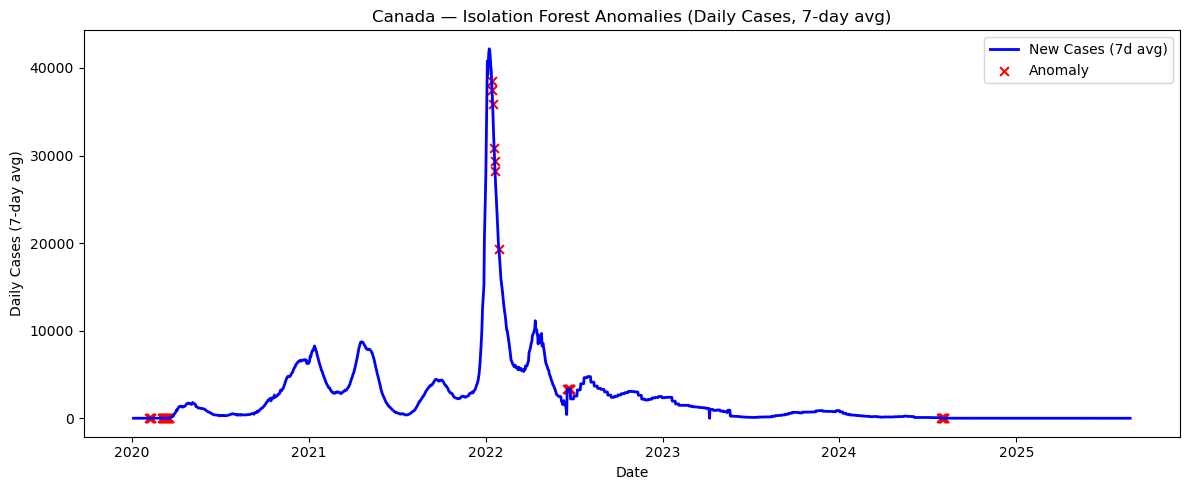

,date,new_cases,new_deaths,new_cases_7d,new_deaths_7d
0,2022-01-14,32475.0,120.0,37530.000000,76.428571
1,2022-01-15,31357.0,106.0,35847.142857,83.285714
2,2022-01-13,28949.0,109.0,38524.000000,68.857143
3,2022-01-18,28538.0,75.0,30865.571429,103.000000
4,2022-01-19,23606.0,124.0,29355.857143,113.714286
5,2022-06-18,23312.0,NaN,3330.285714,0.000000
6,2022-01-20,21163.0,142.0,28243.571429,118.428571
7,2022-01-28,18489.0,223.0,19274.428571,164.857143
8,2020-03-18,75.0,3.0,35.285714,0.428571
9,2020-03-17,56.0,0.0,26.714286,0.000000


Saved: anomalies_iforest_canada.csv


In [24]:
import matplotlib.pyplot as plt

# --- Time series with anomalies highlighted (cases) ---
fig = plt.figure(figsize=(12,5))
ax = plt.gca()

# Plot 7-day rolling for readability
ax.plot(df_country["date"], df_country["new_cases_7d"],
        linewidth=2, color="blue", label="New Cases (7d avg)")

# Overlay anomalies as red X markers
anom = df_country[df_country["is_anomaly"]]
ax.scatter(anom["date"], anom["new_cases_7d"],
           s=40, color="red", marker="x", label="Anomaly")

ax.set_title(f"{country} — Isolation Forest Anomalies (Daily Cases, 7-day avg)")
ax.set_xlabel("Date")
ax.set_ylabel("Daily Cases (7-day avg)")
ax.legend()
plt.tight_layout()
plt.show()

# --- Table: top anomalous days by cases (highest first) ---
top_anom_cases = (
    df_country[df_country["is_anomaly"]]
    .sort_values("new_cases", ascending=False)
    .loc[:, ["date","new_cases","new_deaths","new_cases_7d","new_deaths_7d"]]
    .reset_index(drop=True)
)
display(top_anom_cases.head(15))

# (Optional) Export anomalies to CSV
slug = country.lower().replace(" ", "_")
anom_out = df_country[df_country["is_anomaly"]].loc[:, ["date","new_cases","new_deaths","new_cases_7d","new_deaths_7d"]]
anom_out.to_csv(f"anomalies_iforest_{slug}.csv", index=False)
print(f"Saved: anomalies_iforest_{slug}.csv")


# Final Remarks

- Descriptive stats show central tendency and variability.  
- Dashboards reveal peaks and patterns clearly.  
- AI (Isolation Forest) flagged unusual days automatically.  

**Future Work:**  
- Compare more countries in clusters.  
- Add forecasting (Prophet/ARIMA).  
- Turn into an interactive dashboard (Streamlit/Plotly).  

This completes the workflow: raw data → cleaning → EDA → dashboards → AI insights.